In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [99]:
import tensorflow as tf

# Corrected function call: 'cofig' -> 'config'
devices = tf.config.experimental.list_physical_devices()
print("All available devices:", devices)

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", gpu_devices)

All available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Available GPUs: []


In [6]:
import tensorflow as tf

tf.test.is_built_with_cuda()

True

## Data visualization

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0:5]
# 6 meanas frog

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

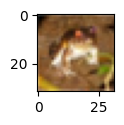

In [12]:
plot_sample(0)

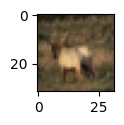

In [13]:
plot_sample(3)

In [14]:
classes = ['aeroplane', 'automobile','bird', 'cat','cat','deer','frog','horse','ship','truck']

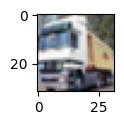

In [15]:
plot_sample(1)

In [16]:
classes[y_train[1][0]]

'truck'

## Data Preaprocessing

In [17]:
X_train_s = X_train/255
X_test_s = X_test/255

X_train_s.shape

(50000, 32, 32, 3)

In [18]:
y_train_c = keras.utils.to_categorical(
    y_train, num_classes=10
)

y_train_c[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
y_test_c = keras.utils.to_categorical(
    y_test, num_classes=10
)

y_train_c[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Model Building

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_s, y_train_c, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 204ms/step - accuracy: 0.2740 - loss: 2.1717
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 319s 204ms/step - accuracy: 0.3893 - loss: 1.6993
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 203ms/step - accuracy: 0.4190 - loss: 1.6190
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 203ms/step - accuracy: 0.4378 - loss: 1.5706
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 202ms/step - accuracy: 0.4450 - loss: 1.5527


In [25]:
predictions = model.predict(X_test_s)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


frog


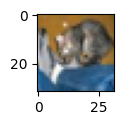

In [39]:
print(classes[np.argmax(predictions[0])])
plt.figure(figsize=(10,1))
plt.imshow(X_test_s[0])

# For benchmarking purpose

In [ ]:
%%timeit -n1 -r1
import tensorflow as tf
from tensorflow import keras 

with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_s, y_train_c, epochs=1)

In [ ]:
&&timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_s, y_train_c, epochs=1)

# Exercise: do the same on fashion mnist dataset

In [73]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [74]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [87]:
classes = [
    "T-shirt/top",
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]



'Ankle boot'

Ankle boot


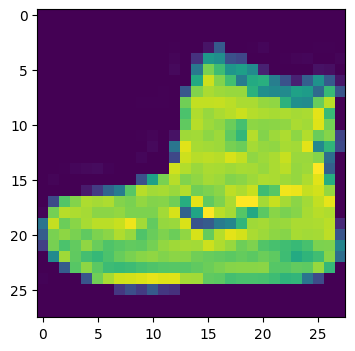

In [89]:
print(classes[y_train[0]])
plt.figure(figsize=(10, 4))
plt.imshow(X_train[0])

In [79]:
X_trian = X_train / 255
X_test = X_test / 255

X_train.shape

(60000, 28, 28)

In [80]:
y_train_c = keras.utils.to_categorical(
    y_train, num_classes = 10
)
y_test_c = keras.utils.to_categorical(
    y_test, num_classes = 10
)

y_train_c.shape

(60000, 10)

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'Adam',
    loss = "categorical_crossentropy",
    metrics =  ['accuracy']
)

model.fit(X_train, y_train_c,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6982 - loss: 5.6763
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7840 - loss: 0.6685
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8108 - loss: 0.5547
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8175 - loss: 0.5314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8386 - loss: 0.4630


In [90]:
val_loss, val_acc = model.evaluate(X_test, y_test_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1062 - loss: 2.4356


In [91]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Pullover


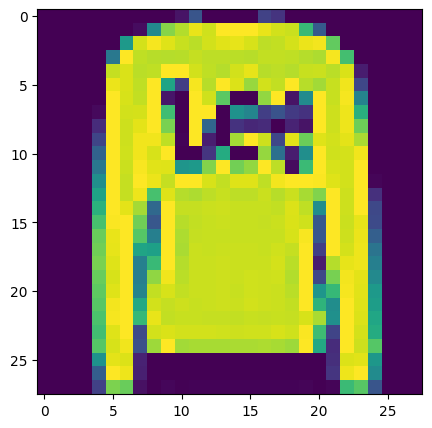

In [98]:

def show(index):
    print(classes[np.argmax(predictions[index])])
    plt.figure(figsize=(10, 5))
    plt.imshow(X_test[index])

show(1)